In [55]:
# %pip install pandas
# %pip install numpy
# %pip install contractions
# %pip install bs4
# %pip install nltk
# %pip install unidecode
# %pip install matplotlib
# %pip install wordcloud
# %pip install scikit-learn
# 

  Using cached scikit_learn-1.4.1.post1-cp310-cp310-macosx_12_0_arm64.whl.metadata (11 kB)
  Using cached scipy-1.12.0-cp310-cp310-macosx_12_0_arm64.whl.metadata (112 kB)
Using cached scikit_learn-1.4.1.post1-cp310-cp310-macosx_12_0_arm64.whl (10.4 MB)
Using cached scipy-1.12.0-cp310-cp310-macosx_12_0_arm64.whl (31.4 MB)
Note: you may need to restart the kernel to use updated packages.


# Importing Libraries

In [1]:
import pandas as pd
import gzip
import json
import re
from bs4 import BeautifulSoup
from unidecode import unidecode
import nltk
import contractions
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
import numpy as np



# Df loading function

In [2]:
def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield json.loads(l)

def getDF(path):
  i = 0
  df = {}
  folder = parse(path)
  for d in folder:
    print(i)
    df[i] = d
    i += 1
  return df



In [ ]:
df = getDF('Electronics_5.json.gz')
data_frame = pd.DataFrame.from_dict(df, orient='index')
data_frame.to_csv('data_frame.csv', index=False)

In [ ]:
df = getDF('meta_Electronics.json.gz')
meta_df = pd.DataFrame.from_dict(df, orient='index')
meta_df.to_csv('meta_data.csv', index=False, escapechar='\\')

In [3]:
data = pd.read_csv("data_frame.csv")
meta_data = pd.read_csv("meta_data.csv")

/var/folders/4f/kjgrgc293tn7cn556xk1h1g40000gn/T/ipykernel_40482/1755724970.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("data_frame.csv")
/var/folders/4f/kjgrgc293tn7cn556xk1h1g40000gn/T/ipykernel_40482/1755724970.py:2: DtypeWarning: Columns (3,6,14) have mixed types. Specify dtype option on import or set low_memory=False.
  meta_data = pd.read_csv("meta_data.csv")


In [4]:
meta_data.head()

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes,details
0,"['Electronics', 'Camera &amp; Photo', 'Video S...",NaN,['The following camera brands and models have ...,NaN,Genuine Geovision 1 Channel 3rd Party NVR IP S...,[],NaN,GeoVision,['Genuine Geovision 1 Channel NVR IP Software'...,"['>#3,092 in Tools &amp; Home Improvement &gt;...",[],Camera &amp; Photo,NaN,"January 28, 2014",$65.00,0011300000,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,NaN
1,"['Electronics', 'Camera &amp; Photo']",NaN,"[""This second edition of the Handbook of Astro...",NaN,"Books ""Handbook of Astronomical Image Processi...",['0999470906'],NaN,33 Books Co.,['Detailed chapters cover these fundamental to...,"['>#55,933 in Camera &amp; Photo (See Top 100 ...","['0943396670', '1138055360', '0999470906']",Camera &amp; Photo,NaN,"June 17, 2003",NaN,0043396828,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,NaN
2,"['Electronics', 'eBook Readers &amp; Accessori...",NaN,['A zesty tale. (Publishers Weekly)<br /><br /...,NaN,One Hot Summer,"['0425167798', '039914157X']",NaN,Visit Amazon's Carolina Garcia Aguilera Page,[],"3,105,177 in Books (",[],Books,NaN,NaN,$11.49,0060009810,[],[],NaN
3,"['Electronics', 'eBook Readers & Accessories',...",NaN,[],NaN,Hurray for Hattie Rabbit: Story and pictures (...,"['0060219521', '0060219580', '0060219394']",NaN,Visit Amazon's Dick Gackenbach Page,[],"2,024,298 in Books (","['0060219521', '0060219475', '0060219394']",Books,NaN,NaN,.a-section.a-spacing-mini{margin-bottom:6px!im...,0060219602,[],[],NaN
4,"['Electronics', 'eBook Readers & Accessories',...",NaN,['&#8220;sex.lies.murder.fame. is brillllli&#8...,NaN,sex.lies.murder.fame.: A Novel,[],NaN,Visit Amazon's Lolita Files Page,[],"3,778,828 in Books (",[],Books,NaN,NaN,$13.95,0060786817,[],[],NaN


In [14]:
meta_data['category'][50]

"['Electronics', 'eBook Readers & Accessories', 'eBook Readers']"

In [10]:
product_indices = []
product = 'USB Cables'
for i in range(len(meta_data)):
    if product in meta_data['category'][i]:
        product_indices.append(i)


product_meta_data_df = meta_data.iloc[product_indices]
product_meta_data_df = product_meta_data_df.dropna(subset=['title', 'asin'])
product_meta_data_df = product_meta_data_df.drop_duplicates()

product_df= pd.merge(data, product_meta_data_df, on='asin', how='inner')
product_df = product_df.dropna(subset=['overall'])
product_df = product_df.drop_duplicates()
print(len(product_df))

1
0


In [3]:

def expand_acronyms(text):
    expanded_words = []    
    for word in text.split():
        expanded_words.append(contractions.fix(word))  
    expanded_text = ' '.join(expanded_words)
    return expanded_text
def remove_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()
def remove_accented_chars(text):
    return unidecode(text)
def remove_special_characters(text):
    return re.sub(r'[^a-zA-Z\s]', '', text)
def lemmatize_text(text):
    tokens = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text
def normalize_text(text):
    text = text.lower()
    text = expand_acronyms(text)
    text = remove_html_tags(text)
    text = remove_accented_chars(text)
    text = remove_special_characters(text)
    text = lemmatize_text(text)
    return text


def generate_wordcloud(text_list, title):
    text = ' '.join(text_list)
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = None, 
                min_font_size = 10).generate(text)

    # Plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title(title)
  
    plt.show()

In [ ]:
product_df['reviewText'] = product_df['reviewText'].astype(str)
for i in range(len(product_df)):
    print(i)
    pre_text =  normalize_text(product_df['reviewText'].iloc[i])
    product_df.loc[i, "reviewText"]=pre_text
    
product_df.to_csv('product.csv', index=False)

In [4]:
product_df = pd.read_csv("product.csv")
product_df['date'] = pd.to_datetime(product_df['date'], format='%B %d, %Y', errors='coerce')
product_df['reviewText'] = product_df['reviewText'].astype(str)
product_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124237 entries, 0 to 124236
Data columns (total 30 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   overall          120806 non-null  float64       
 1   vote             7329 non-null    object        
 2   verified         120806 non-null  object        
 3   reviewTime       120806 non-null  object        
 4   reviewerID       120806 non-null  object        
 5   asin             120806 non-null  object        
 6   style            68955 non-null   object        
 7   reviewerName     120775 non-null  object        
 8   reviewText       124237 non-null  object        
 9   summary          120784 non-null  object        
 10  unixReviewTime   120806 non-null  float64       
 11  image            1181 non-null    object        
 12  category         120806 non-null  object        
 13  tech1            51449 non-null   object        
 14  description      120

/var/folders/4f/kjgrgc293tn7cn556xk1h1g40000gn/T/ipykernel_58705/2996743397.py:1: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  product_df = pd.read_csv("product.csv")


In [5]:
total_reviews = product_df['reviewText'].count()
average_rating = product_df['overall'].mean()
num_unique_products = product_df['asin'].nunique()
good_ratings = product_df[product_df['overall'] >= 3]['overall'].count()
bad_ratings = product_df[product_df['overall'] < 3]['overall'].count()
rating_counts = product_df['overall'].value_counts().sort_index()

# Display the results
print(" . Number of rows for the product:", len(product_df))
print("a. Number of Reviews:", total_reviews)
print("b. Average Rating Score:", average_rating)
print("c. Number of Unique Products:", num_unique_products)
print("d. Number of Good Ratings:", good_ratings)
print("e. Number of Bad Ratings:", bad_ratings)
print("f. Number of Reviews corresponding to each Rating:")
print(rating_counts)


 . Number of rows for the product: 124237
a. Number of Reviews: 124237
b. Average Rating Score: 4.365503369037961
c. Number of Unique Products: 2591
d. Number of Good Ratings: 107710
e. Number of Bad Ratings: 13096
f. Number of Reviews corresponding to each Rating:
overall
1.0     8621
2.0     4475
3.0     6809
4.0    15124
5.0    85777
Name: count, dtype: int64


In [6]:
import warnings
import tqdm

# Raise all warnings as exceptions
warnings.filterwarnings("ignore")

In [7]:
top_20_most_reviewed_brands = product_df['brand'].value_counts().head(20)
top_20_least_reviewed_brands = product_df['brand'].value_counts().tail(20)
most_positively_reviewed_usb = product_df.groupby('title')['overall'].mean().nlargest(1)
good_ratings_review = product_df[product_df['overall'] >= 3]
bad_ratings_review = product_df[product_df['overall'] < 3]


print("a. Top 20 most reviewed brands:")
print(top_20_most_reviewed_brands)
print("b. Top 20 least reviewed brands:")
print(top_20_least_reviewed_brands)
print("c. Most positively reviewed USB Cable:")
print(most_positively_reviewed_usb)


a. Top 20 most reviewed brands:
brand
AmazonBasics      15395
Cable Matters      8674
Mediabridge        5585
StarTech           5052
Anker              3914
Belkin             3622
INSTEN             2682
Monoprice          2526
Generic            2093
iSeekerKit         1631
C2G                1466
Sabrent            1394
Samsung            1302
C&E                1212
Mission Cables     1169
Tripp Lite         1168
TRENDnet           1124
CableCreation      1045
UGREEN             1037
Eversame            989
Name: count, dtype: int64
b. Top 20 least reviewed brands:
brand
Innovate Motorsports    5
CoverON                 5
Philips                 5
D-Link                  5
maxinbuy                5
F.DORLA                 5
KKmoon                  5
Clarion                 5
Weiup                   5
SODIAL                  5
LINESO                  5
WIT Inc.                5
X-EDITION               5
TEVIWIN                 5
HQRP                    5
TTMSTUFF                5
B

In [8]:
ratings_over_years = product_df.set_index('date').groupby(pd.Grouper(freq='Y')).size().head(100)
print("d. Count of ratings for the product over 5 consecutive years:")
print(ratings_over_years)

d. Count of ratings for the product over 5 consecutive years:
date
1973-12-31       13
1974-12-31        0
1975-12-31        0
1976-12-31        0
1977-12-31        0
1978-12-31        0
1979-12-31        0
1980-12-31        0
1981-12-31        0
1982-12-31        0
1983-12-31        0
1984-12-31        0
1985-12-31        0
1986-12-31        0
1987-12-31        0
1988-12-31        0
1989-12-31        0
1990-12-31        0
1991-12-31        0
1992-12-31        0
1993-12-31        0
1994-12-31        0
1995-12-31        0
1996-12-31        0
1997-12-31        0
1998-12-31        0
1999-12-31      216
2000-12-31       12
2001-12-31     2403
2002-12-31      535
2003-12-31     1217
2004-12-31     3250
2005-12-31     2605
2006-12-31     1595
2007-12-31     1638
2008-12-31     5356
2009-12-31     2991
2010-12-31     4876
2011-12-31     8620
2012-12-31     4931
2013-12-31    10326
2014-12-31     9444
2015-12-31    18976
2016-12-31     7620
2017-12-31     2817
2018-12-31     1533
dtype: int64


e.
107710 13096


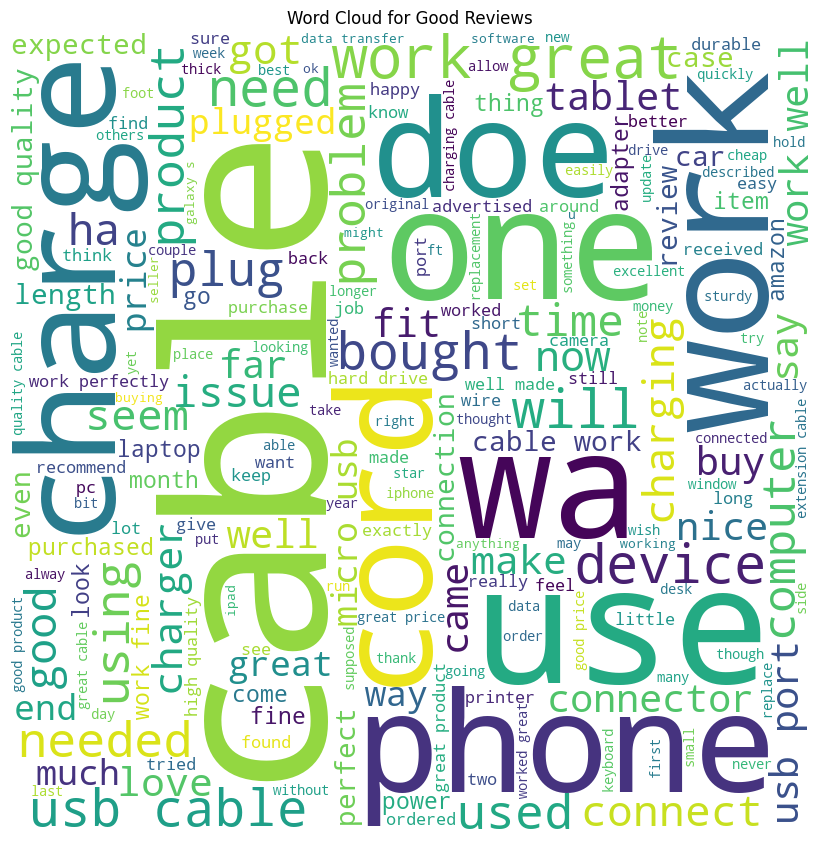

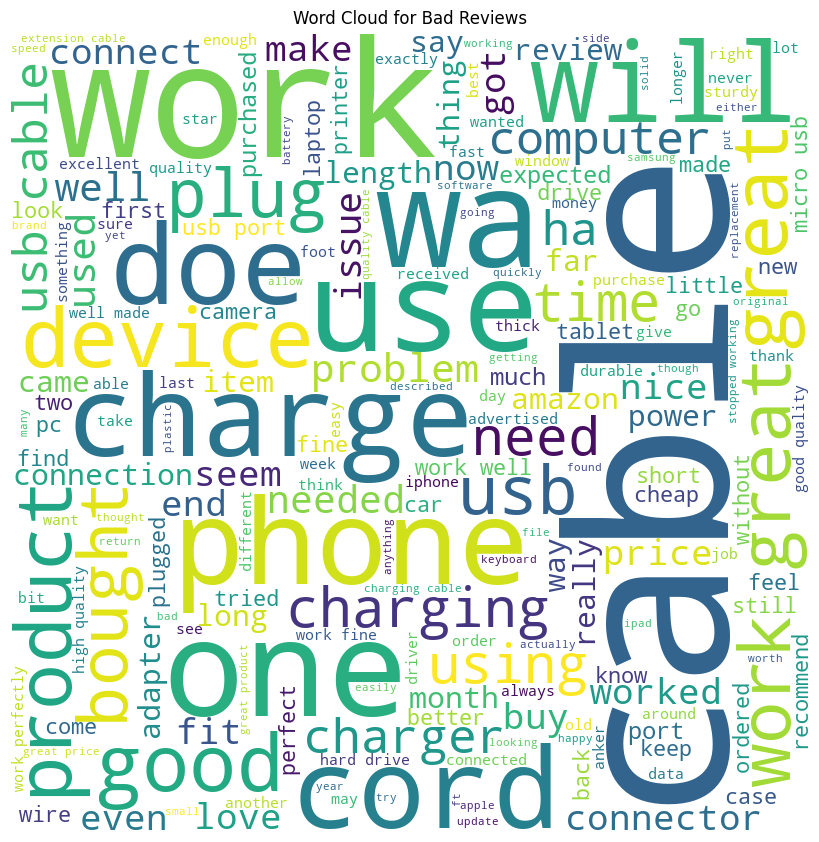

In [9]:
print("e.")
good_ratings_review =list(product_df[product_df['overall'] >= 3]['reviewText'])
bad_ratings_review = list(product_df[product_df['overall'] < 3]['reviewText'])
print(len(good_ratings_review), len(bad_ratings_review))
generate_wordcloud(good_ratings_review, 'Word Cloud for Good Reviews')
generate_wordcloud(bad_ratings_review, 'Word Cloud for Bad Reviews')

f.


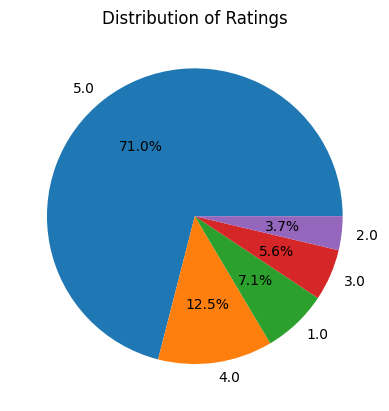

In [10]:
print("f.")
ratings_distribution = product_df['overall'].value_counts()
ratings_distribution.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Ratings')
plt.ylabel('')
plt.show()

In [11]:
year_with_max_reviews = product_df['date'].dt.year.value_counts().idxmax()
year_with_max_customers = product_df.groupby(product_df['date'].dt.year)['reviewerID'].nunique().idxmax()

print("g. Year with maximum reviews:", year_with_max_reviews)
print("h. Year with the highest number of customers:", year_with_max_customers)

g. Year with maximum reviews: 2015.0
h. Year with the highest number of customers: 2015.0


In [31]:
good_threshold = 4.0
bad_threshold = 3.0

product_df = product_df.dropna(subset=['overall', 'reviewText'])
product_df['Rating Class'] = product_df['overall'].apply(lambda x: 'Good' if x >= good_threshold else ('Average' if x == bad_threshold else 'Bad'))

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(product_df['Rating Class'])

label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:")
print(label_mapping)

tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(product_df['reviewText'])


indices_y0 = np.where(y == 0)[0]
indices_y1 = np.where(y == 1)[0]
indices_y2 = np.where(y == 2)[0]

num_indices_to_select = int(0.1 * len(indices_y2))

selected_indices_y2 = np.random.choice(indices_y2, size=num_indices_to_select, replace=False)

sampled_indices = np.concatenate([indices_y0, indices_y1, selected_indices_y2])

sampled_X = X[sampled_indices]
sampled_y = y[sampled_indices]
# print(sampled_y.shape, sampled_X.shape)

X_train, X_test, y_train, y_test = train_test_split(sampled_X, sampled_y, test_size=0.25, random_state=42)

# import numpy as np
# count_0 = np.count_nonzero(y_train == 0)
# print("Occurrences of value 0 in y_test:", count_0)
# count_1 = np.count_nonzero(y_train == 1)
# print("Occurrences of value 1 in y_test:", count_1)
# count_2 = np.count_nonzero(y_train == 2)
# print("Occurrences of value 2 in y_test:", count_2)

# count_0 = np.count_nonzero(y_test == 0)
# print("Occurrences of value 0 in y_test:", count_0)
# count_1 = np.count_nonzero(y_test == 1)
# print("Occurrences of value 1 in y_test:", count_1)
# count_2 = np.count_nonzero(y_test == 2)
# print("Occurrences of value 2 in y_test:", count_2)

models = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(),
    'Random Forest': RandomForestClassifier(n_estimators = 100),
    'Decision Tree': DecisionTreeClassifier(),
    'Multinomial Naive Bayes': MultinomialNB(),
    # 'Gradient Boosting': GradientBoostingClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, target_names=['Bad', 'Average', 'Good'])
    print(f'Model: {name}')
    print(report)

Label Mapping:
{'Average': 0, 'Bad': 1, 'Good': 2}
(120806, 36636)
(29995,) (29995, 36636)
Model: Logistic Regression
              precision    recall  f1-score   support

         Bad       0.23      0.04      0.07      1695
     Average       0.45      0.72      0.56      3305
        Good       0.36      0.27      0.31      2499

    accuracy                           0.42      7499
   macro avg       0.34      0.34      0.31      7499
weighted avg       0.37      0.42      0.36      7499

Model: Support Vector Machine
              precision    recall  f1-score   support

         Bad       0.34      0.01      0.02      1695
     Average       0.45      0.84      0.58      3305
        Good       0.37      0.19      0.25      2499

    accuracy                           0.44      7499
   macro avg       0.39      0.35      0.29      7499
weighted avg       0.40      0.44      0.35      7499

Model: Random Forest
              precision    recall  f1-score   support

         Bad  

# Collaborative Filtering

In [23]:
sampled_df = product_df.sample(frac=0.1, random_state=42) 
sampled_df.reset_index(drop=True, inplace=True)

sampled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12424 entries, 0 to 12423
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   overall          12079 non-null  float64       
 1   vote             702 non-null    object        
 2   verified         12079 non-null  object        
 3   reviewTime       12079 non-null  object        
 4   reviewerID       12079 non-null  object        
 5   asin             12079 non-null  object        
 6   style            6865 non-null   object        
 7   reviewerName     12074 non-null  object        
 8   reviewText       12424 non-null  object        
 9   summary          12077 non-null  object        
 10  unixReviewTime   12079 non-null  float64       
 11  image            114 non-null    object        
 12  category         12079 non-null  object        
 13  tech1            5079 non-null   object        
 14  description      12079 non-null  objec

In [13]:
rating_matrix = sampled_df.pivot_table(index='reviewerID', columns='asin', values='overall')


In [14]:
rating_matrix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22755 entries, A0036244LFNO78OM4135 to AZZS13C32YSPH
Columns: 2302 entries, 9966338926 to B01HJH42KU
dtypes: float64(2302)
memory usage: 399.8+ MB


In [15]:
len(set(product_df['asin']))

2592

In [16]:
rating_matrix

asin,9966338926,9984988309,9985537742,B00000J1TX,B00000J1U8,B0000488VF,B00004RIUB,B00004Z5IE,B00004Z5IU,B00004Z5M1,...,B01HEXFQVI,B01HF0YGCK,B01HGIXLOK,B01HGLHX3M,B01HJCN1D4,B01HJCN1EI,B01HJCN5GC,B01HJCN5TO,B01HJH40WU,B01HJH42KU
reviewerID,,,,,,,,,,,,,,,,,,,,,
A0036244LFNO78OM4135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A0743345UFTOA4V1Z7W,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A1005MBN8XCJHJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A1007NRYNXDJKL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A100IO6BTJO3Y5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AZYSLPX9HUWPW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AZZEZWZNWW4JK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AZZFRY8O72WH8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
min_rating = rating_matrix.min().min()
max_rating = rating_matrix.max().max()
normalized_rating_matrix = (rating_matrix - min_rating) / (max_rating - min_rating)
normalized_rating_matrix = normalized_rating_matrix.fillna(0)

In [18]:
non_zero_count = np.count_nonzero(normalized_rating_matrix)

print("Number of non-zero values in the DataFrame:", non_zero_count)

Number of non-zero values in the DataFrame: 22461


In [19]:
normalized_rating_matrix.head()

asin,9966338926,9984988309,9985537742,B00000J1TX,B00000J1U8,B0000488VF,B00004RIUB,B00004Z5IE,B00004Z5IU,B00004Z5M1,...,B01HEXFQVI,B01HF0YGCK,B01HGIXLOK,B01HGLHX3M,B01HJCN1D4,B01HJCN1EI,B01HJCN5GC,B01HJCN5TO,B01HJH40WU,B01HJH42KU
reviewerID,,,,,,,,,,,,,,,,,,,,,
A0036244LFNO78OM4135,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0743345UFTOA4V1Z7W,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1005MBN8XCJHJ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1007NRYNXDJKL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A100IO6BTJO3Y5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:


def find_similar_users_2(user_id, rating_matrix, val_vector, top_n):
    # Calculate cosine similarity between the given user (val_vector) and all users in the training set (rating_matrix)
    similarity = cosine_similarity(rating_matrix, val_vector.reshape(1, -1))
    
    # Sort the similarities and get the indices of top_n similar users
    similar_users = np.argsort(similarity[:, 0])[::-1][:top_n]
    
    return similar_users

def user_user_recommendation(rating_matrix, k_folds, top_ns):
    kf = KFold(n_splits=k_folds)
    mae_values = []
    
    for top_n in top_ns:
        fold_mae = []
        for train_index, val_index in kf.split(rating_matrix):
            train_set = rating_matrix.iloc[train_index]
            val_set = rating_matrix.iloc[val_index]
            # print(train_set.shape, val_set.shape)
            predicted_ratings = np.zeros_like(val_set)
            val_ratings = np.zeros_like(val_set)
            count = 0
            for user_id, user_ratings in val_set.iterrows():
                # print(count, "\\", len(val_set))
                similar_users = find_similar_users_2(user_id, train_set,user_ratings.values, top_n)
                avg_rating = train_set.iloc[similar_users].mean(axis=0)
                predicted_ratings[count] = avg_rating.values
                val_ratings[count] = user_ratings.values
                count += 1

                # print("--")
            break
                
        mae_values.append(mean_absolute_error(val_ratings[val_ratings != 0], predicted_ratings[val_ratings != 0]))
        print(top_n ,"-Done")
    return mae_values


def item_item_recommendation(rating_matrix, k_folds, top_ns):
    kf = KFold(n_splits=k_folds)
    mae_values = []
    
    for top_n in top_ns:
        fold_mae = []
        rating_matrix_transposed = rating_matrix.T
        # print(rating_matrix_transposed.info())
        for train_index, val_index in kf.split(rating_matrix_transposed):
            train_set = rating_matrix_transposed.iloc[train_index]
            val_set = rating_matrix_transposed.iloc[val_index]
            predicted_ratings = np.zeros_like(val_set)
            val_ratings = np.zeros_like(val_set)
            count = 0
            for user_id, user_ratings in val_set.iterrows():

                similar_users = find_similar_users_2(user_id, train_set,user_ratings.values, top_n)
                avg_rating = train_set.iloc[similar_users].mean(axis=0)
                predicted_ratings[count] = avg_rating.values
                val_ratings[count] = user_ratings.values
                count += 1
            break
                
        mae_values.append(mean_absolute_error(val_ratings[val_ratings != 0], predicted_ratings[val_ratings != 0]))
        print(top_n ,"-Done")
    return mae_values
                # predicted_ratings = avg_rating
                # predicted_ratings.append(avg_rating)
            # break

In [22]:
top_ns = [10, 20, 30, 40, 50]
k_folds = 5
user_mae_values = user_user_recommendation(normalized_rating_matrix, k_folds ,top_ns)

KeyboardInterrupt: 

In [ ]:
top_ns  = [10, 20, 30, 40, 50]
k_folds = 5
item_mae_values = item_item_recommendation(normalized_rating_matrix, k_folds ,top_ns)

10 -Done
20 -Done
30 -Done
40 -Done
50 -Done


In [ ]:
print(user_mae_values, item_mae_values)

[0.3456919945725916, 0.42525629428614503, 0.4795806321925725, 0.5212187170209559, 0.5536687773254937] [0.9115651135005973, 0.9131600955794504, 0.9136917562724014, 0.9139575866188769, 0.9141170848267621]


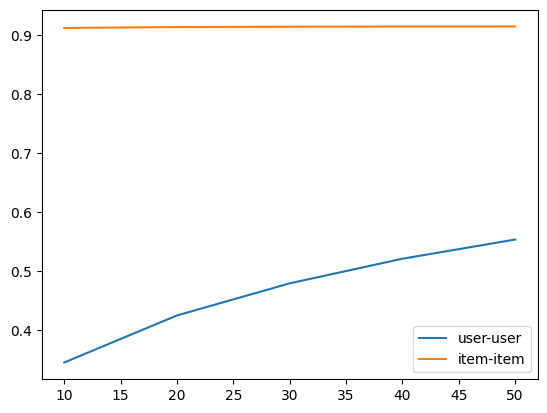

In [ ]:
plt.plot([10, 20, 30, 40, 50], user_mae_values, label = "user-user")
plt.plot([10, 20, 30, 40, 50], item_mae_values, label = "item-item")
plt.legend()
plt.show()

In [75]:
top_products = product_df.groupby('title')['overall'].sum().sort_values(ascending=False).head(10)
print("Top 10 products by user sum ratings:")
print(top_products)

Top 10 products by user sum ratings:
title
AmazonBasics USB 3.0 Cable - A-Male to Micro-B - 3 Feet (0.9 Meters)                                                                            10962.0
AmazonBasics Micro-USB to USB 2.0 Cable - 6 Feet (1.8 Meters)                                                                                   10761.0
AmazonBasics USB 3.0 Extension Cable - A-Male to A-Female - 3 Feet (2 Pack)                                                                      8305.0
Mediabridge USB 2.0 - A Male to B Male Cable (10 Feet) - High-Speed w/ Gold-Plated Connectors - Black (Part# 30-001-10B )                        7909.0
Insten Micro USB OTG to USB 2.0 Adapter Cable Compatible With Samsung Galaxy S7/S6/S6 Edge/Note 4/3                                              6637.0
10 ft Micro USB Cable - A to Micro B                                                                                                             6532.0
Mediabridge USB 2.0 - USB Extension Cable (6 

In [76]:
# top_products = product_df.groupby('asin')['overall'].sum().sort_values(ascending=False).head(10)
# print("Top 10 products by user sum ratings:")
# print(top_products)

Top 10 products by user sum ratings:
asin
B00C28L6EW    10761.0
B00B3P15M8     8305.0
B00BCY1AA2     8143.0
B001MSU1HG     7909.0
B005QX7KYU     6637.0
B0017JY5F4     6532.0
B001MSU1FS     6344.0
B00SUX3XQC     6045.0
B00CFLBU88     5193.0
B002BR6DF6     4937.0
Name: overall, dtype: float64
